<a href="https://colab.research.google.com/github/NANA100908/Student-Placement-Prediction-Model/blob/main/Project_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/Data_placement.csv')

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

##1. Display Top 5 Rows of The Dataset

In [ ]:
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
data.tail()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
data.fillna(0, inplace=True)

In [ ]:
label_encoder = LabelEncoder()
data['ExtracurricularActivities'] = label_encoder.fit_transform(data['ExtracurricularActivities'])
data['PlacementTraining'] = label_encoder.fit_transform(data['PlacementTraining'])

In [ ]:
# Split the data into features and target
X = data.drop(['StudentID', 'PlacementStatus'], axis=1)
y = data['PlacementStatus']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize and train the models
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate Random Forest
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Evaluate Logistic Regression
lr_predictions = lr_classifier.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))


Random Forest Classification Report:
               precision    recall  f1-score   support

   NotPlaced       0.81      0.83      0.82      1172
      Placed       0.75      0.71      0.73       828

    accuracy                           0.79      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.78      0.79      0.78      2000

Logistic Regression Classification Report:
               precision    recall  f1-score   support

   NotPlaced       0.83      0.81      0.82      1172
      Placed       0.74      0.77      0.75       828

    accuracy                           0.79      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.79      0.79      0.79      2000



In [ ]:
def random_predict_placement_probability():
    cgpa = float(input("Enter CGPA: "))
    internships = int(input("Enter number of internships: "))
    projects = int(input("Enter number of projects: "))
    workshops_certifications = int(input("Enter number of workshops/certifications: "))
    aptitude_test_score = int(input("Enter Aptitude Test Score: "))
    soft_skills_rating = float(input("Enter Soft Skills Rating: "))
    extracurricular_activities = int(input("Enter Extracurricular Activities (1 for Yes, 0 for No): "))
    placement_training = int(input("Enter Placement Training (1 for Yes, 0 for No): "))
    ssc_marks = int(input("Enter SSC Marks: "))
    hsc_marks = int(input("Enter HSC Marks: "))

    features = [[
        cgpa, internships, projects, workshops_certifications, aptitude_test_score,
        soft_skills_rating, extracurricular_activities, placement_training, ssc_marks, hsc_marks
    ]]

    placement_probability = rf_classifier.predict_proba(features)[:, 1]  # Probability of placement

    print(f"Placement Probability: {placement_probability[0]:.2f}")

In [ ]:
random_predict_placement_probability()

Enter CGPA: 8.11
Enter number of internships: 1
Enter number of projects: 4
Enter number of workshops/certifications: 3
Enter Aptitude Test Score: 50
Enter Soft Skills Rating: 50
Enter Extracurricular Activities (1 for Yes, 0 for No): 0
Enter Placement Training (1 for Yes, 0 for No): 1
Enter SSC Marks: 91
Enter HSC Marks: 86
Placement Probability: 0.62


# Using KNN Model

In [ ]:
# Initialize and train the model (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors
knn_classifier.fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Function to take real-time input and predict placement probability
def predict_placement_probability():
    cgpa = float(input("Enter CGPA: "))
    internships = int(input("Enter number of internships: "))
    projects = int(input("Enter number of projects: "))
    workshops_certifications = int(input("Enter number of workshops/certifications: "))
    aptitude_test_score = int(input("Enter Aptitude Test Score: "))
    soft_skills_rating = float(input("Enter Soft Skills Rating: "))
    extracurricular_activities = int(input("Enter Extracurricular Activities (1 for Yes, 0 for No): "))
    placement_training = int(input("Enter Placement Training (1 for Yes, 0 for No): "))
    ssc_marks = int(input("Enter SSC Marks: "))
    hsc_marks = int(input("Enter HSC Marks: "))

    features = [[
        cgpa, internships, projects, workshops_certifications, aptitude_test_score,
        soft_skills_rating, extracurricular_activities, placement_training, ssc_marks, hsc_marks
    ]]

    placement_probability = knn_classifier.predict_proba(features)[:, 1]  # Probability of placement

    print(f"Placement Probability: {placement_probability[0]:.2f}")

In [ ]:
# Call the prediction function
predict_placement_probability()

Enter CGPA: 8.1
Enter number of internships: 2
Enter number of projects: 5
Enter number of workshops/certifications: 2
Enter Aptitude Test Score: 59
Enter Soft Skills Rating: 4.5
Enter Extracurricular Activities (1 for Yes, 0 for No): 1
Enter Placement Training (1 for Yes, 0 for No): 1
Enter SSC Marks: 86
Enter HSC Marks: 92
Placement Probability: 0.40


##Comparing Accuracy

In [ ]:
# Initialize and compare different models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}


In [ ]:
for model_name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Placed', average='binary')
    recall = recall_score(y_test, y_pred, pos_label='Placed', average='binary')
    f1 = f1_score(y_test, y_pred, pos_label='Placed', average='binary')

    # Check if the model supports predict_proba
    if hasattr(model, 'predict_proba'):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-Score: {f1:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print()
    else:
        print(f"Model: {model_name} does not support probability estimation.")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-Score: {f1:.2f}")
        print()

Model: Random Forest
Accuracy: 0.78
Precision: 0.74
Recall: 0.72
F1-Score: 0.73
ROC AUC: 0.87

Model: Logistic Regression
Accuracy: 0.79
Precision: 0.74
Recall: 0.77
F1-Score: 0.75
ROC AUC: 0.86

Model: K-Nearest Neighbors
Accuracy: 0.76
Precision: 0.71
Recall: 0.70
F1-Score: 0.71
ROC AUC: 0.81

Model: Support Vector Machine does not support probability estimation.
Accuracy: 0.78
Precision: 0.73
Recall: 0.74
F1-Score: 0.73

Model: Naive Bayes
Accuracy: 0.79
Precision: 0.73
Recall: 0.80
F1-Score: 0.76
ROC AUC: 0.88



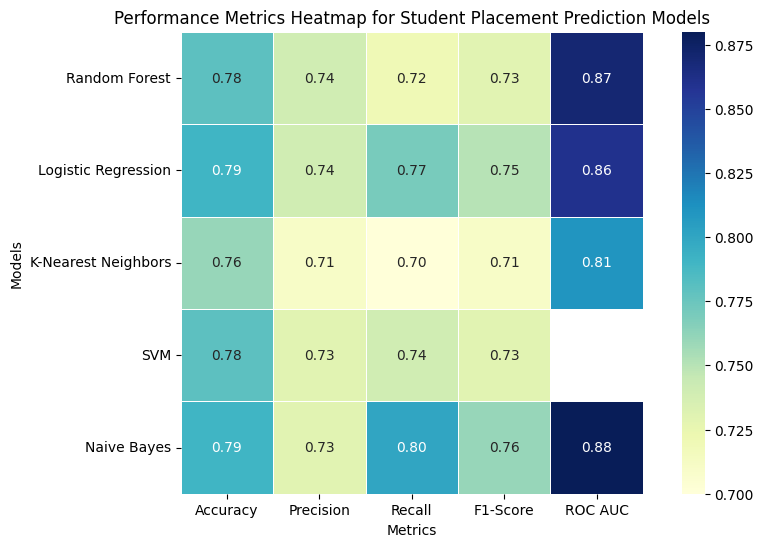

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with your performance metrics data
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes'],
    'Accuracy': [0.78, 0.79, 0.76, 0.78, 0.79],
    'Precision': [0.74, 0.74, 0.71, 0.73, 0.73],
    'Recall': [0.72, 0.77, 0.70, 0.74, 0.80],
    'F1-Score': [0.73, 0.75, 0.71, 0.73, 0.76],
    'ROC AUC': [0.87, 0.86, 0.81, None, 0.88]
}

df = pd.DataFrame(data)

# Set the 'Model' column as the index
df.set_index('Model', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt='.2f', cbar=True, linewidths=0.5, square=True)

# Add labels and a title
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.title('Performance Metrics Heatmap for Student Placement Prediction Models')

# Display the heatmap
plt.show()


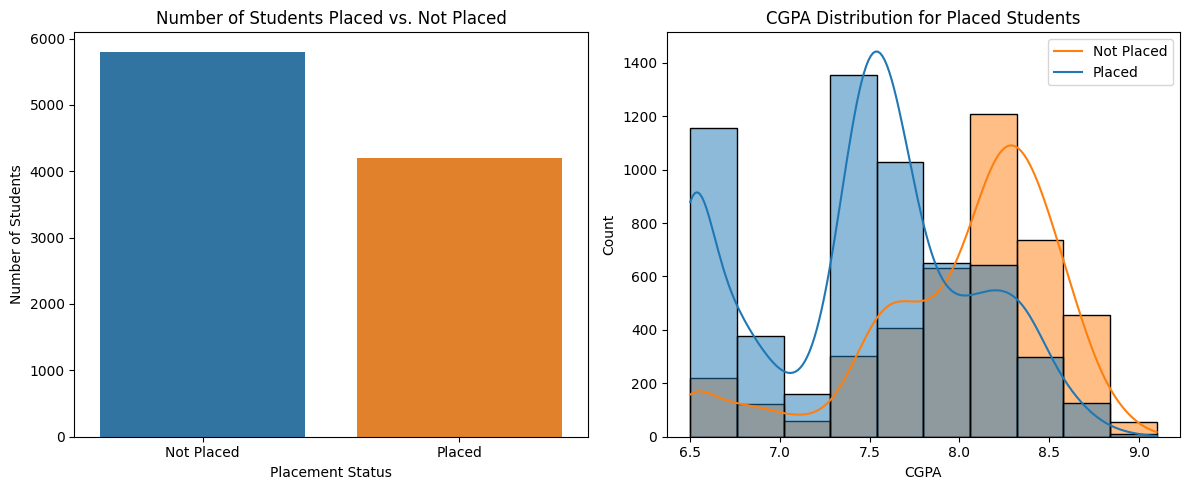

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/Data_placement.csv')

# Assuming your dataset has a 'PlacementStatus' column that indicates placement (1 for placed, 0 for not placed)
# and other attributes like 'CGPA', 'Internships', and 'AptitudeTestScore'

# Create subplots
plt.figure(figsize=(12, 5))

# Count of Placed vs. Not Placed Students
plt.subplot(121)
sns.countplot(x='PlacementStatus', data=df)
plt.xticks([0, 1], ['Not Placed', 'Placed'])
plt.xlabel('Placement Status')
plt.ylabel('Number of Students')
plt.title('Number of Students Placed vs. Not Placed')

# CGPA Distribution for Placed Students
plt.subplot(122)
sns.histplot(data=df, x='CGPA', kde=True, hue='PlacementStatus', bins=10)
plt.legend(['Not Placed', 'Placed'])
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.title('CGPA Distribution for Placed Students')

# Adjust layout
plt.tight_layout()
plt.show()
